In [2]:
## Install Pandas Data Reader
!pip install pandas-datareader


In [4]:
df = pd.read_csv("DailyDelhiClimateTest.csv")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
df.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [6]:
df.tail()

,date,meantemp,humidity,wind_speed,meanpressure
109,2017-04-20,34.500,27.500000,5.562500,998.625000
110,2017-04-21,34.250,39.375000,6.962500,999.875000
111,2017-04-22,32.900,40.900000,8.890000,1001.600000
112,2017-04-23,32.875,27.500000,9.962500,1002.125000
113,2017-04-24,32.000,27.142857,12.157143,1004.142857


In [7]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
109    False
110    False
111    False
112    False
113    False
Length: 114, dtype: bool

In [9]:
df.duplicated(keep='last')

0      False
1      False
2      False
3      False
4      False
       ...  
109    False
110    False
111    False
112    False
113    False
Length: 114, dtype: bool

In [10]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [11]:
df.duplicated(subset=None, keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
109    False
110    False
111    False
112    False
113    False
Length: 114, dtype: bool

In [12]:
df.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df.dtypes

date            datetime64[ns]
meantemp               float64
humidity               float64
wind_speed             float64
meanpressure           float64
dtype: object

Text(0.5, 1.0, 'Box plot showing the outliers')

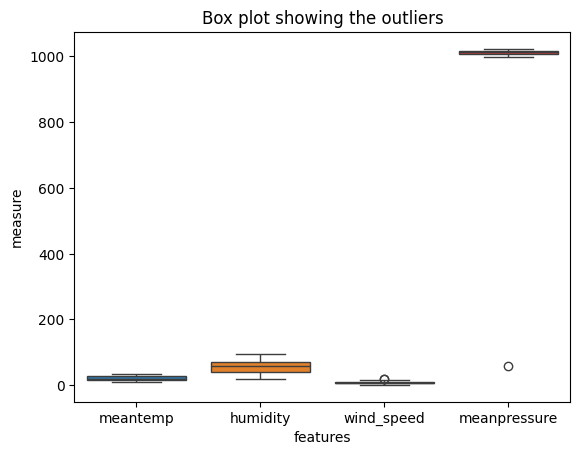

In [15]:
sns.boxplot(df)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#label and title
plt.xlabel('features',fontsize=10)
plt.ylabel('measure',fontsize=10)
plt.title("Box plot showing the outliers",fontsize=12)

In [16]:
from scipy import stats


In [17]:
Q1=df['meanpressure'].quantile(0.25)
Q3=df['meanpressure'].quantile(0.75)
IQR=Q3-Q1
print(IQR)


9.302083333333371


In [18]:
upper = Q3 + 1.5 * IQR
upper_array = np.array(df['meanpressure'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1 - 1.5 * IQR
lower_array = np.array(df['meanpressure'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 1030.6927083333335
0
Lower Bound: 993.484375
1


<Axes: ylabel='meanpressure'>

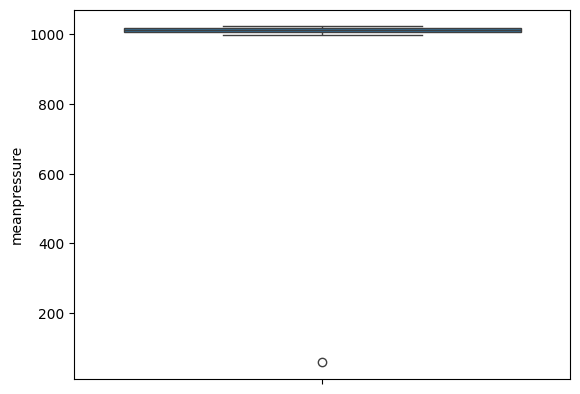

In [19]:
sns.boxplot(df['meanpressure'])


In [20]:
df.drop(index=upper_array.sum(), inplace=True)
df.drop(index=lower_array.sum(), inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)


New Shape:  (112, 5)


<Axes: >

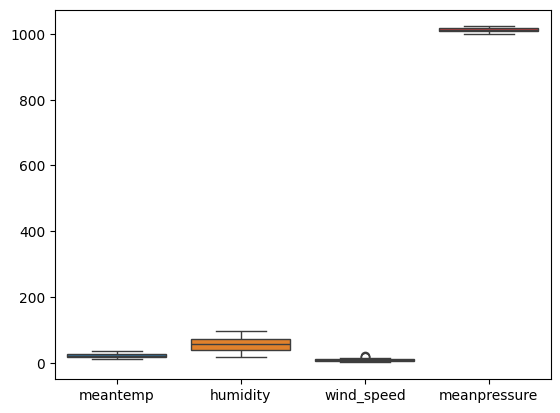

In [21]:
sns.boxplot(df)


In [22]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,112.000000,112.000000,112.000000,112.000000
mean,21.793553,55.806799,8.239013,1012.345736
std,6.385667,18.922965,3.547666,5.708187
min,11.000000,17.750000,1.387500,998.625000
25%,16.442029,39.375000,5.792667,1007.479167
50%,19.906250,56.937500,8.218750,1012.739316
75%,27.892857,71.096618,10.105208,1016.663194
max,34.500000,95.833333,19.314286,1022.809524


In [23]:
df.set_index('date',inplace=True)


<Axes: xlabel='date'>

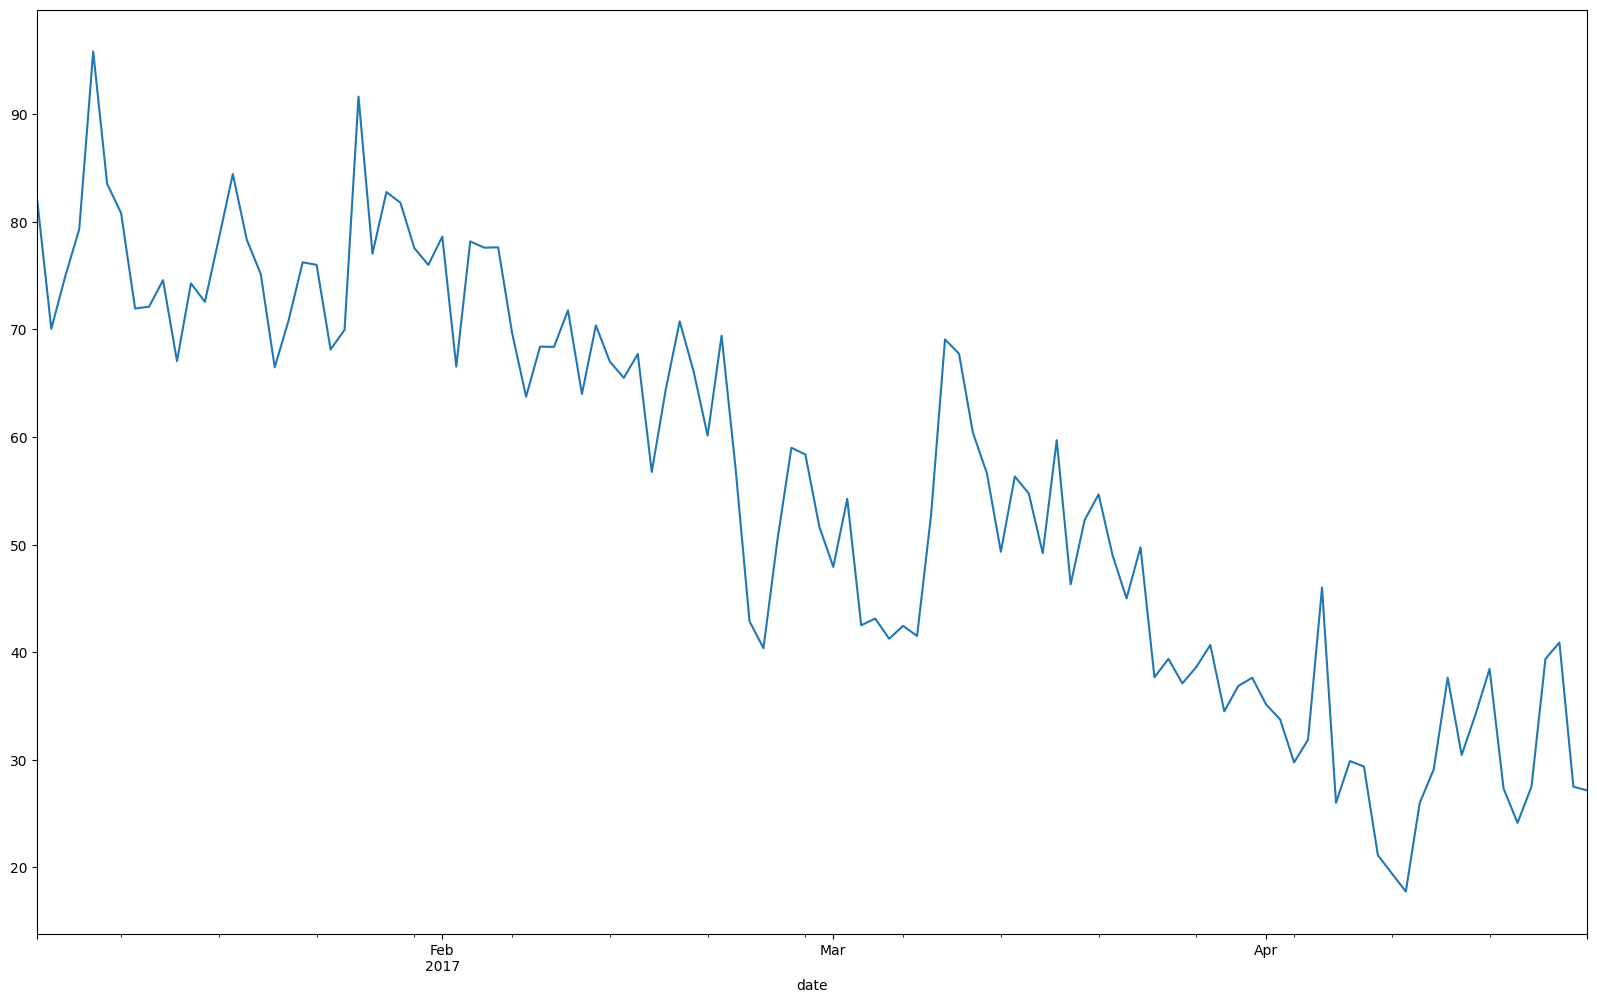

In [24]:
df['humidity'].plot(figsize=(20,12))


Text(0.5, 1.0, 'Humidity of first Four Months')

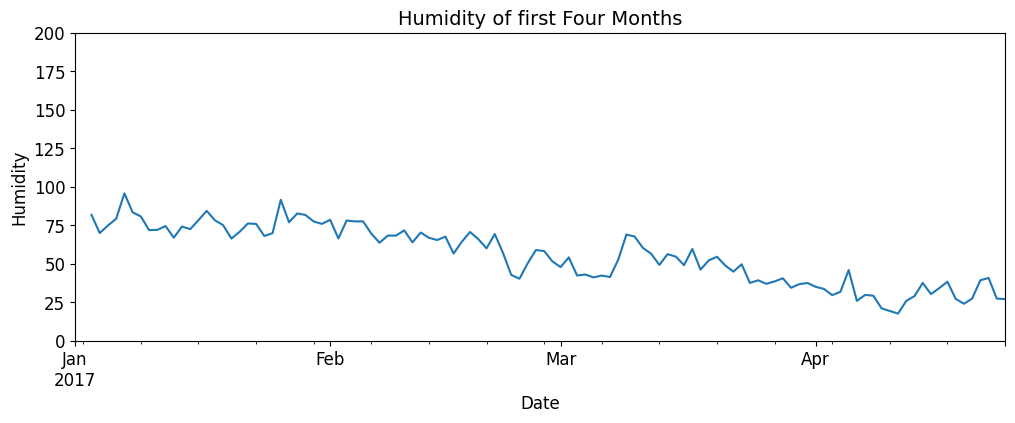

In [25]:
df['humidity'].plot(xlim=['2017-01-01','2017-04-24'],ylim=[0,200],figsize=(12,4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Humidity',fontsize=12)
plt.title('Humidity of first Four Months', fontsize=14)

In [26]:
df.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10',
               '2017-01-11', '2017-01-12',
               ...
               '2017-04-15', '2017-04-16', '2017-04-17', '2017-04-18',
               '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-22',
               '2017-04-23', '2017-04-24'],
              dtype='datetime64[ns]', name='date', length=112, freq=None)

In [27]:
date_specific_humidity=df.loc['2017-02-03':'2017-04-24']['humidity']

In [28]:
date_specific_humidity

date
2017-02-03    78.181818
2017-02-04    77.600000
2017-02-05    77.631579
2017-02-06    69.666667
2017-02-07    63.750000
                ...    
2017-04-20    27.500000
2017-04-21    39.375000
2017-04-22    40.900000
2017-04-23    27.500000
2017-04-24    27.142857
Name: humidity, Length: 81, dtype: float64

In [29]:
from datetime import datetime

In [30]:
datetime.now()

datetime.datetime(2024, 3, 13, 3, 24, 19, 816955)

In [31]:
df['humidity:30 days rolling']=df['humidity'].rolling(30).mean()

In [32]:
df

,meantemp,humidity,wind_speed,meanpressure,humidity:30 days rolling
date,,,,,
2017-01-03,17.111111,81.888889,4.016667,1018.333333,NaN
2017-01-04,18.700000,70.050000,4.545000,1015.700000,NaN
2017-01-05,18.388889,74.944444,3.300000,1014.333333,NaN
2017-01-06,19.318182,79.318182,8.681818,1011.772727,NaN
2017-01-07,14.708333,95.833333,10.041667,1011.375000,NaN
...,...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000,33.068135
2017-04-21,34.250000,39.375000,6.962500,999.875000,32.880635
2017-04-22,32.900000,40.900000,8.890000,1001.600000,32.585635


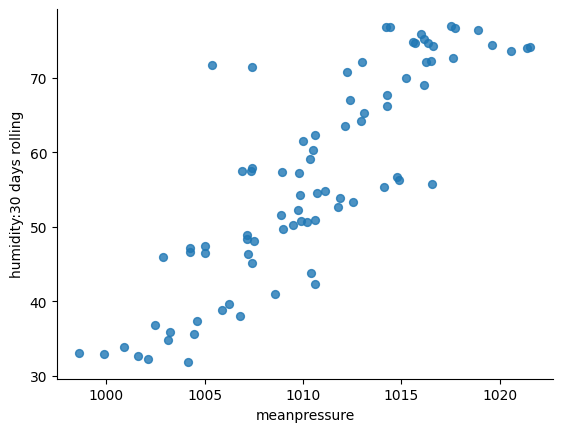

In [33]:
# @title meanpressure vs humidity:30 days rolling

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='meanpressure', y='humidity:30 days rolling', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
df['humidity:30 days rolling']=df['humidity'].rolling(30).mean()

<Axes: xlabel='date'>

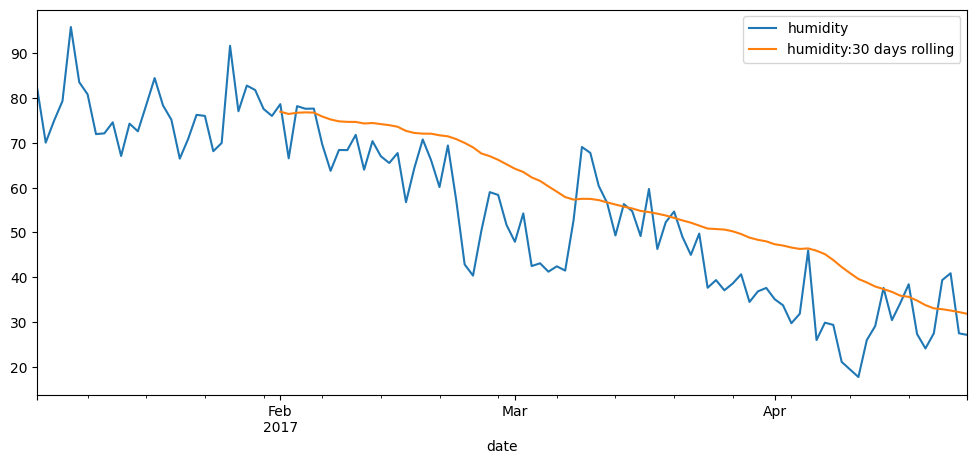

In [35]:
df[['humidity','humidity:30 days rolling']].plot(figsize=(12,5))

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [39]:
adf_test(df['humidity'])

ADF Statistics: -0.512165873633337
p- value: 0.8896204628956041
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [40]:
df['Humidity first difference']=df['humidity']-df['humidity'].shift(1)

In [41]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,humidity:30 days rolling,Humidity first difference
date,,,,,,
2017-01-03,17.111111,81.888889,4.016667,1018.333333,NaN,NaN
2017-01-04,18.700000,70.050000,4.545000,1015.700000,NaN,-11.838889
2017-01-05,18.388889,74.944444,3.300000,1014.333333,NaN,4.894444
2017-01-06,19.318182,79.318182,8.681818,1011.772727,NaN,4.373737
2017-01-07,14.708333,95.833333,10.041667,1011.375000,NaN,16.515152


In [42]:
adf_test(df['Humidity first difference'].dropna())

ADF Statistics: -6.564277581788931
p- value: 8.23339030199703e-09
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

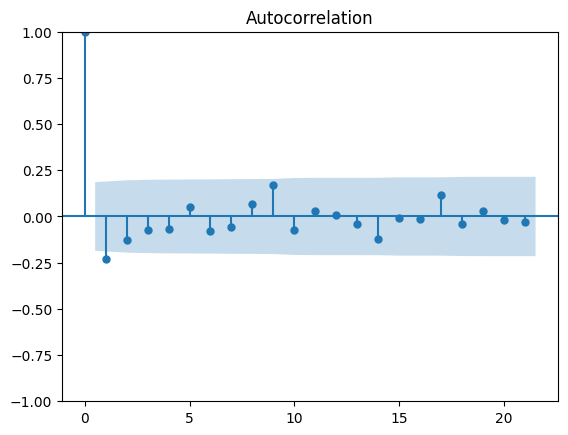

In [44]:
acf=plot_acf(df['Humidity first difference'].dropna())

As values are close to 0, so we can say values between consecutive observation are not correlated with one another. And autocorrelation values are not beyond the confidence interval(blue shaded area). (Significant, here at lag 1, we have greatest autocorrelation).

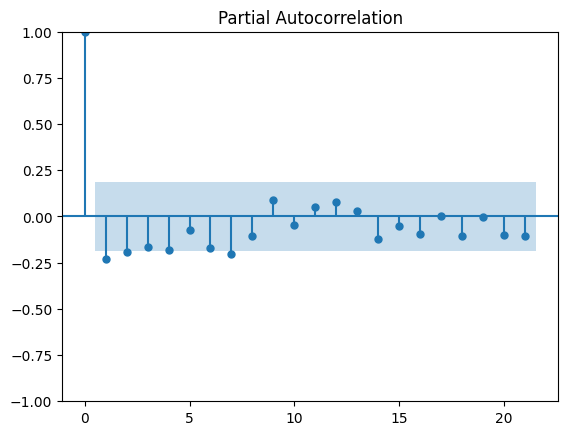

In [45]:
result = plot_pacf(df["Humidity first difference"].dropna())

PACF = The influence of the particular one lag on y, after removing the effect of all the intermideate lags.

In [46]:
df

,meantemp,humidity,wind_speed,meanpressure,humidity:30 days rolling,Humidity first difference
date,,,,,,
2017-01-03,17.111111,81.888889,4.016667,1018.333333,NaN,NaN
2017-01-04,18.700000,70.050000,4.545000,1015.700000,NaN,-11.838889
2017-01-05,18.388889,74.944444,3.300000,1014.333333,NaN,4.894444
2017-01-06,19.318182,79.318182,8.681818,1011.772727,NaN,4.373737
2017-01-07,14.708333,95.833333,10.041667,1011.375000,NaN,16.515152
...,...,...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000,33.068135,3.375000
2017-04-21,34.250000,39.375000,6.962500,999.875000,32.880635,11.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000,32.585635,1.525000


In [50]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2017,3,31)
test_dataset_end=datetime(2017,4,24)

In [52]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [53]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [54]:
test_data

,meantemp,humidity,wind_speed,meanpressure,humidity:30 days rolling,Humidity first difference
date,,,,,,
2017-04-01,31.375000,35.125000,9.037500,1005.000000,47.375081,-2.500000
2017-04-02,29.750000,33.750000,9.262500,1004.250000,47.083414,-1.375000
2017-04-03,30.500000,29.750000,6.937500,1004.250000,46.637581,-4.000000
2017-04-04,30.933333,31.866667,14.320000,1007.200000,46.324803,2.116667
2017-04-05,29.230769,46.000000,14.384615,1005.000000,46.443322,14.133333
2017-04-06,31.222222,26.000000,13.577778,1002.888889,45.926655,-20.000000
2017-04-07,27.000000,29.875000,4.650000,1007.375000,45.164912,3.875000
2017-04-08,25.625000,29.375000,8.337500,1010.375000,43.841698,-0.500000
2017-04-09,27.125000,21.125000,14.125000,1010.625000,42.287532,-8.250000


ARIMA = ARMA + preliminary differencing procedure.


In [55]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [56]:
train_data

,meantemp,humidity,wind_speed,meanpressure,humidity:30 days rolling,Humidity first difference
date,,,,,,
2017-01-03,17.111111,81.888889,4.016667,1018.333333,NaN,NaN
2017-01-04,18.700000,70.050000,4.545000,1015.700000,NaN,-11.838889
2017-01-05,18.388889,74.944444,3.300000,1014.333333,NaN,4.894444
2017-01-06,19.318182,79.318182,8.681818,1011.772727,NaN,4.373737
2017-01-07,14.708333,95.833333,10.041667,1011.375000,NaN,16.515152
...,...,...,...,...,...,...
2017-03-27,29.500000,38.625000,13.650000,1009.500000,50.256445,1.525000
2017-03-28,29.888889,40.666667,8.844444,1009.000000,49.645334,2.041667
2017-03-29,31.000000,34.500000,13.200000,1007.125000,48.849501,-6.166667


In [60]:
!pip install statsmodels

In [61]:
from statsmodels.tsa.arima.model import ARIMA

In [74]:
model_ARIMA = ARIMA(train_data['humidity'], order=(0, 2, 0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [75]:
model_Arima_fit=model_ARIMA.fit()

In [76]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               humidity   No. Observations:                   88
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -332.470
Date:                Wed, 13 Mar 2024   AIC                            666.940
Time:                        05:34:58   BIC                            669.394
Sample:                    01-03-2017   HQIC                           667.928
                         - 03-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       133.4852     19.316      6.911      0.000      95.627     171.343
===================================================================================
Ljung-Box (L1) (Q):                  26.10   Jarque-Bera (JB):                 2.30
Prob(Q):                              0.00   Prob(JB):                         0.32
Heteroskedasticity (H):               0.68   Skew:                            -0.38
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
test_data

,meantemp,humidity,wind_speed,meanpressure,humidity:30 days rolling,Humidity first difference,Predicted_ARIMA
date,,,,,,,
2017-04-01,31.375000,35.125000,9.037500,1005.000000,47.375081,-2.500000,37.625
2017-04-02,29.750000,33.750000,9.262500,1004.250000,47.083414,-1.375000,37.625
2017-04-03,30.500000,29.750000,6.937500,1004.250000,46.637581,-4.000000,37.625
2017-04-04,30.933333,31.866667,14.320000,1007.200000,46.324803,2.116667,37.625
2017-04-05,29.230769,46.000000,14.384615,1005.000000,46.443322,14.133333,37.625
2017-04-06,31.222222,26.000000,13.577778,1002.888889,45.926655,-20.000000,37.625
2017-04-07,27.000000,29.875000,4.650000,1007.375000,45.164912,3.875000,37.625
2017-04-08,25.625000,29.375000,8.337500,1010.375000,43.841698,-0.500000,37.625
2017-04-09,27.125000,21.125000,14.125000,1010.625000,42.287532,-8.250000,37.625


In [78]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)


2017-04-01 00:00:00
2017-04-24 00:00:00


In [79]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['humidity']-pred

In [80]:
pred

2017-04-01    38.392857
2017-04-02    39.160714
2017-04-03    39.928571
2017-04-04    40.696429
2017-04-05    41.464286
2017-04-06    42.232143
2017-04-07    43.000000
2017-04-08    43.767857
2017-04-09    44.535714
2017-04-10    45.303571
2017-04-11    46.071429
2017-04-12    46.839286
2017-04-13    47.607143
2017-04-14    48.375000
2017-04-15    49.142857
2017-04-16    49.910714
2017-04-17    50.678571
2017-04-18    51.446429
2017-04-19    52.214286
2017-04-20    52.982143
2017-04-21    53.750000
2017-04-22    54.517857
2017-04-23    55.285714
2017-04-24    56.053571
Freq: D, Name: predicted_mean, dtype: float64

In [81]:
residuals

date
2017-04-01    -3.267857
2017-04-02    -5.410714
2017-04-03   -10.178571
2017-04-04    -8.829762
2017-04-05     4.535714
2017-04-06   -16.232143
2017-04-07   -13.125000
2017-04-08   -14.392857
2017-04-09   -23.410714
2017-04-10   -25.875000
2017-04-11   -28.321429
2017-04-12   -20.839286
2017-04-13   -18.496032
2017-04-14   -10.750000
2017-04-15   -18.698413
2017-04-16   -15.660714
2017-04-17   -12.234127
2017-04-18   -24.113095
2017-04-19   -28.089286
2017-04-20   -25.482143
2017-04-21   -14.375000
2017-04-22   -13.617857
2017-04-23   -27.785714
2017-04-24   -28.910714
dtype: float64

<Axes: ylabel='Density'>

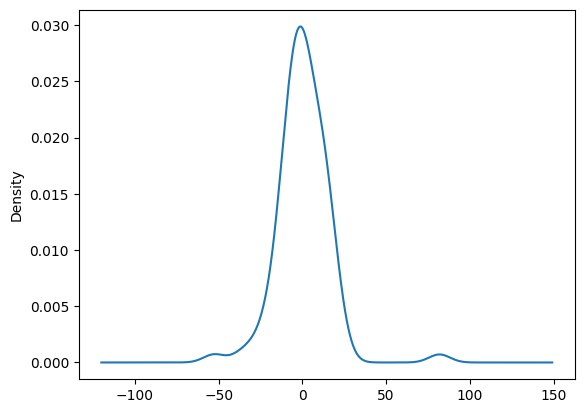

In [82]:
model_Arima_fit.resid.plot(kind = 'kde')

In [83]:
test_data['Predicted_ARIMA']=pred

<ipython-input-83-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='date'>

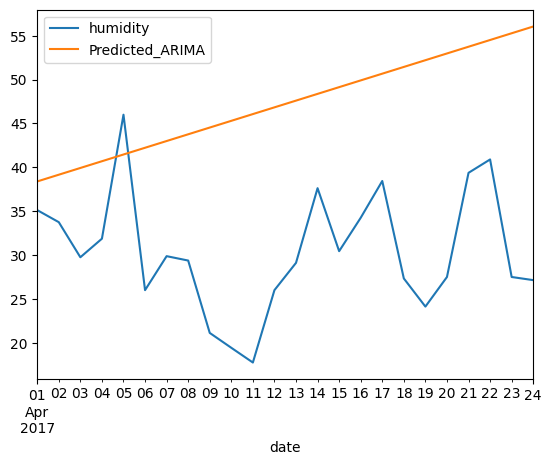

In [84]:
test_data[['humidity','Predicted_ARIMA']].plot()

In [85]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [86]:
model_SARIMA=SARIMAX(train_data['humidity'],order=(0,2,0),seasonal_order=(0,2,1,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [87]:
model_SARIMA_fit=model_SARIMA.fit()

In [88]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             humidity   No. Observations:                   88
Model:             SARIMAX(0, 2, 0)x(0, 2, [1], 12)   Log Likelihood                -276.886
Date:                              Wed, 13 Mar 2024   AIC                            557.771
Time:                                      06:10:34   BIC                            562.026
Sample:                                  01-03-2017   HQIC                           559.442
                                       - 03-31-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9976     41.137     -0.024      0.981     -81.624      79.629
sigma2       312.5758   1.28e+04      0.024      0.981   -2.49e+04    2.55e+04
===================================================================================
Ljung-Box (L1) (Q):                  20.53   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.00   Prob(JB):                         0.58
Heteroskedasticity (H):               0.82   Skew:                             0.27
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
test_data.tail()

,meantemp,humidity,wind_speed,meanpressure,humidity:30 days rolling,Humidity first difference,Predicted_ARIMA
date,,,,,,,
2017-04-20,34.500,27.500000,5.562500,998.625000,33.068135,3.375000,52.982143
2017-04-21,34.250,39.375000,6.962500,999.875000,32.880635,11.875000,53.750000
2017-04-22,32.900,40.900000,8.890000,1001.600000,32.585635,1.525000,54.517857
2017-04-23,32.875,27.500000,9.962500,1002.125000,32.246746,-13.400000,55.285714
2017-04-24,32.000,27.142857,12.157143,1004.142857,31.839008,-0.357143,56.053571


In [90]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2017-04-01 00:00:00
2017-04-24 00:00:00


In [91]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2017,4,1),end=datetime(2017,4,24))
residuals=test_data['humidity']-pred_Sarima

<Axes: xlabel='date'>

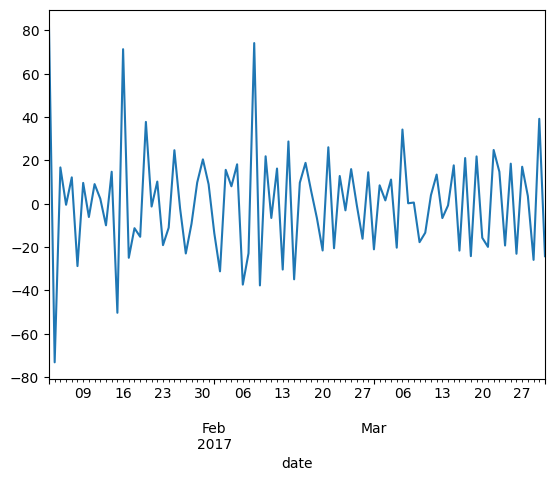

In [92]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

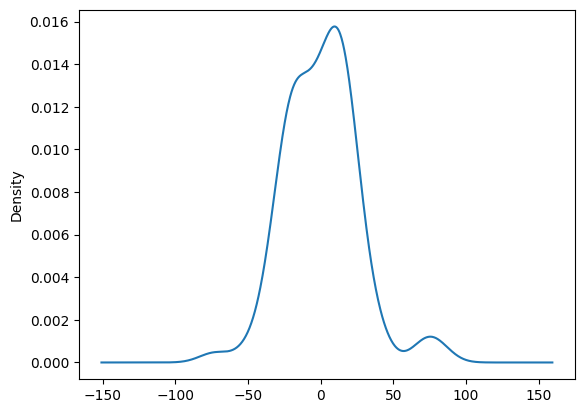

In [93]:
model_SARIMA_fit.resid.plot(kind='kde')

In [94]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-94-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


<Axes: xlabel='date'>

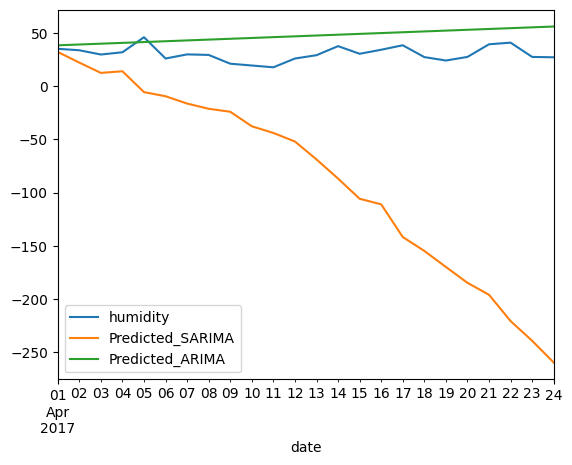

In [96]:
test_data[['humidity','Predicted_SARIMA','Predicted_ARIMA']].plot()